In [34]:
import os
os.listdir('/anvar/public_datasets/preproc_study/gbm/dicom/TCGA-02-0086/')

['T1', 'T2', 'CT1', 'RTSTRUCT', 'FLAIR', 'RTSTRUCT_DICOM']

In [32]:
import glob

glob.glob('/anvar/public_datasets/preproc_study/gbm/dicom/TCGA-02-0086/')

['/anvar/public_datasets/preproc_study/gbm/dicom/TCGA-02-0086/']

In [29]:
for i in glob.glob('/anvar/public_datasets/preproc_study/gbm/dicom/*/*.json'):
#     os.remove(i)

### 1. GBM repository

In [11]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/1_reg/TCGA-06-0154/')

['T2.nii.gz', 'FLAIR.nii.gz', 'T1.nii.gz', 'CT1_SEG.nii.gz', 'CT1.nii.gz']

  0%|          | 0/35 [00:00<?, ?it/s]

/home/kate/projects/qc_preprocessing/3c_n4_susan_gbm/


  6%|▌         | 2/35 [00:08<02:17,  4.15s/it]


KeyboardInterrupt: 

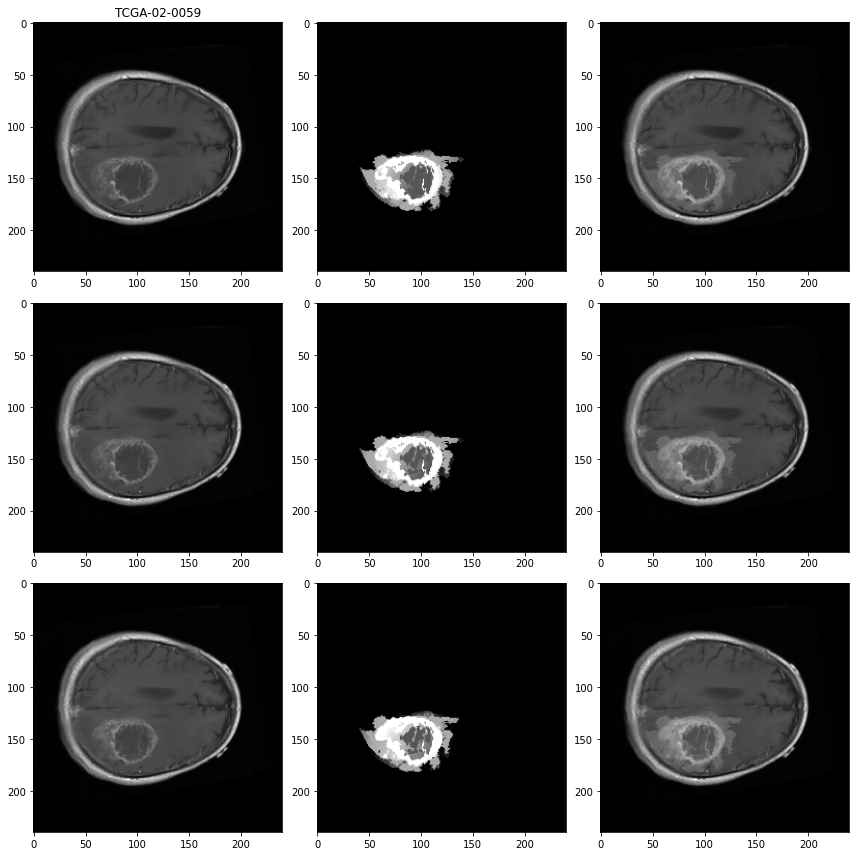

In [4]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tqdm
import ants

path = '3c_n4_susan'

print('/home/kate/projects/qc_preprocessing/{}_gbm/'.format(path))
os.makedirs('/home/kate/projects/qc_preprocessing/{}_gbm/'.format(path), exist_ok = True)

def plot_qc(image, mask, patient_id):
    fig, axs = plt.subplots(3,3,figsize=(12,12))
    idx = np.argsort(mask.sum(axis=(0,1)))[-3:]
    for i in range(3):
        axs[i, 0].imshow(image[..., idx[i]], cmap='gray')
        axs[i, 1].imshow(mask[..., idx[i]], cmap='gray')
        axs[i, 2].imshow(image[..., idx[i]]+200*mask[..., idx[i]], cmap='gray')
    axs[0,0].set_title(patient_id)
    plt.tight_layout()
    plt.savefig(f'/home/kate/projects/qc_preprocessing/{path}_gbm/{patient_id}.png', dpi=300)
    plt.plot()
    plt.close(fig)

output = '/anvar/public_datasets/preproc_study/gbm/{}/'.format(path)

for patient in tqdm.tqdm(os.listdir(output)):
    try:
        im = ants.image_read(output + patient +'/CT1.nii.gz')
        mask = ants.image_read(output + patient +'/CT1_SEG.nii.gz')
        plot_qc(im, mask, patient_id=str(patient))
    except Exception as e:
        print(e, patient)

In [54]:
base_dir = '/anvar/public_datasets/preproc_study/gbm/orig/'
list_patients = os.listdir(base_dir)

In [36]:
import ants
import pandas as pd
sizes_frame = pd.DataFrame(columns = ['id','t1_x', 't1_y', 't1_z', 't1c_x', 't1c_y', 't1c_z'])
import numpy as np
for i in list_patients:
    try:
        t1_size = np.shape(ants.image_read(base_dir + i + '/T1.nii.gz').numpy())
        t1c_size = np.shape(ants.image_read(base_dir + i + '/CT1.nii.gz').numpy())
        sizes_frame = sizes_frame.append(
        {'id': i,
        't1_x':t1_size[0],
        't1_y':t1_size[1],
        't1_z':t1_size[2],
        't1c_x':t1c_size[0],
        't1c_y':t1c_size[1],
        't1c_z':t1c_size[2]}, ignore_index=True
        )
    except:
        pass

In [37]:
sizes_frame

,id,t1_x,t1_y,t1_z,t1c_x,t1c_y,t1c_z
0,TCGA-02-0086,256,256,23,256,256,23
1,TCGA-02-0048,256,256,23,256,256,23
2,TCGA-02-0102,256,256,23,256,256,23
3,TCGA-02-0059,256,256,124,512,512,23
4,TCGA-02-0069,256,256,24,512,512,124
...,...,...,...,...,...,...,...
126,TCGA-08-0352,256,256,44,256,256,124
127,TCGA-06-0142,256,256,56,256,256,56
128,TCGA-06-0648,512,512,36,512,512,71
129,TCGA-02-0037,256,256,23,256,256,23


<AxesSubplot:>

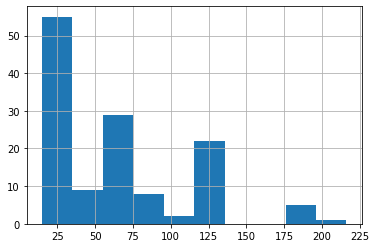

In [42]:
sizes_frame['t1c_z'].hist()

In [40]:
len(sizes_frame[(sizes_frame['t1_z'] >= sizes_frame['t1c_z'])])

75

In [41]:
len(sizes_frame[(sizes_frame['t1_z'] <= sizes_frame['t1c_z'])])

125

### Delete repos with no mask:

In [82]:
tcia_folder = '/anvar/public_datasets/tcia/manifest-1588284345182/TCGA-GBM/'
list_masks = os.listdir(tcia_folder)
len(os.listdir(tcia_folder))

103

In [175]:
len(os.listdir('/anvar/public_datasets/preproc_study/gbm/dicom/'))

135

In [176]:
import shutil
for i in os.listdir('/anvar/public_datasets/preproc_study/gbm/dicom/'):
    if i not in list_masks:
        print(i)
        shutil.rmtree('/anvar/public_datasets/preproc_study/gbm/dicom/' + i, ignore_errors=True)

TCGA-02-0048
TCGA-06-0168
TCGA-06-0133
TCGA-12-1602
TCGA-06-0649
TCGA-08-0354
TCGA-08-0529
TCGA-06-0213
TCGA-06-0241
TCGA-08-0357
TCGA-08-0358
TCGA-14-1829
TCGA-02-0060
TCGA-06-5412
TCGA-08-0350
TCGA-08-0521
TCGA-14-0789
TCGA-27-1838
TCGA-08-0510
TCGA-08-0524
TCGA-06-0128
TCGA-06-0166
TCGA-27-2526
TCGA-06-0132
TCGA-08-0353
TCGA-12-1093
TCGA-27-1834
TCGA-02-0003
TCGA-06-0175
TCGA-19-1390
TCGA-06-0189
TCGA-08-0352
TCGA-06-0648


In [65]:
import pandas as pd

gbm_paths = pd.read_csv('gbm_paths.csv')

In [71]:
print(gbm_paths['T2'][gbm_paths['ID'] == 'TCGA-06-0182'].values)

[' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-06-0182/09-01-2002-MRI BRAIN WWO CONTRAS-96990/6.000000-AXIAL FSE-19198']


In [72]:
print(gbm_paths['FLAIR'][gbm_paths['ID'] == 'TCGA-06-0182'].values)

[' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-06-0182/09-01-2002-MRI BRAIN WWO CONTRAS-96990/7.000000-AxFLAIR-thin for surgery-31783']


In [78]:
os.listdir(tcia_gbm_raw + 'TCGA-06-0182' + '/09-01-2002-MRI BRAIN WWO CONTRAS-96990' )

['7.000000-AxFLAIR-thin for surgery-31783',
 '6.000000-AXIAL FSE-19198',
 '9.000000-AXIAL T1-13082',
 '13.000000-AxT1-thin for surgery-12089']

### Double check the for right modalities

In [ ]:
1. удалить нии
2. сохранить новые нии
3. удалить лишние директории из диком
3* проверить на сайте маски
4. переименовать Ct1 c буквой
5. просмотреть глазами
6. просмотреть список анвара
7. повторить для lgg
8. сохранить регистрацию


1. скопировать чуваков (их нет на уранусе, попрошу Влада)
2. пересохранить два файла (есть)
3. удалить лишний нейминг 
4. проверить файлы по названию

In [146]:
gbm_paths['T1C'][gbm_paths['ID'] == 'TCGA-12-0616'] = ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-12-0616/04-12-1999-Routine Brain-03138/8.000000-cor mprage c-81607'

In [206]:
import glob2
glob2.glob('/anvar/public_datasets/tcia/**/*filepart*')

['/anvar/public_datasets/tcia/manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-02-0075/09-24-1999-MRI BRAIN WWO CONTRAST-32875/17.000000-Ax SE T1 Post-08723/1-01.dcm.filepart',
 '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-DU-A5TP/06-14-1997-MRI BRAIN WWO CONTRAST-14542/8.000000-DTI 2.6mm WH-90495/1-0340.dcm.filepart',
 '/anvar/public_datasets/tcia/training_data/TCGA-02-0075/CT1/1-01.dcm.filepart']

In [162]:
shutil.rmtree('/anvar/public_datasets/preproc_study/gbm/dicom/TCGA-12-0616/CT1')
shutil.copytree('/anvar/public_datasets/tcia/manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-12-0616/04-12-1999-Routine Brain-03138/8.000000-cor mprage c-81607', 
                '/anvar/public_datasets/preproc_study/gbm/dicom/TCGA-12-0616/CT1') 

'/anvar/public_datasets/preproc_study/gbm/dicom/TCGA-12-0616/CT1'

In [ ]:
cp /anvar/public_datasets/tcia/manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-02-0075/09-24-1999-MRI\ BRAIN\ WWO\ CONTRAST-32875/17.000000-Ax\ SE\ T1\ Post-08723/1-01.dcm /anvar/public_datasets/preproc_study/gbm/dicom/TCGA-02-0075/CT1

In [ ]:
/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-DU-A5TP/06-14-1997-MRI\ BRAIN\ WWO\ CONTRAST-14542/8.000000-DTI\ 2.6mm\ WH-90495/

In [ ]:
dcm2niix -b n -f CT1 -z y -o /data/orig/TCGA-02-0075/ /data/dicom/TCGA-02-0075/CT1/

In [ ]:
dcm2niix -b n -f CT1 -z y -o /data/orig/TCGA-12-0616/ /data/dicom/TCGA-12-0616/CT1/

In [166]:
os.remove('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-12-0616/CT1.nii.gz')
# dcm2niix -b n -f CT1 -z y -o /data/orig/TCGA-06-0646/ /data/dicom/TCGA-06-0646/CT1/

In [154]:
gbm_paths['T1C'][gbm_paths['ID'] == 'TCGA-76-6282'] = ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-76-6282/08-24-1998-JHN BRAIN COMBO IP-22866/5.000000-BRAINSTRYKERT2AXDOUBLE-70745'

In [163]:
shutil.rmtree('/anvar/public_datasets/preproc_study/gbm/dicom/TCGA-76-6282/CT1')
shutil.copytree('/anvar/public_datasets/tcia/manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-76-6282/08-24-1998-JHN BRAIN COMBO IP-22866/5.000000-BRAINSTRYKERT2AXDOUBLE-70745', 
                '/anvar/public_datasets/preproc_study/gbm/dicom/TCGA-76-6282/CT1')

'/anvar/public_datasets/preproc_study/gbm/dicom/TCGA-76-6282/CT1'

In [207]:
os.remove('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-76-6282/CT1.nii.gz')
#dcm2niix -b n -f CT1 -z y -o /data/orig/TCGA-76-6282/ /data/dicom/TCGA-76-6282/CT1/

In [161]:
gbm_paths['T1C'][gbm_paths['ID'] == 'TCGA-76-6193'] = ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-76-6193/06-02-2001-MRI BRAIN STRYKER JHN IP-60175/9.000000-BRAINSTRYKERAX-RAGE-STRY-89080'

In [164]:
shutil.rmtree('/anvar/public_datasets/preproc_study/gbm/dicom/TCGA-76-6193/CT1')
shutil.copytree('/anvar/public_datasets/tcia/manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-76-6193/06-02-2001-MRI BRAIN STRYKER JHN IP-60175/9.000000-BRAINSTRYKERAX-RAGE-STRY-89080', 
                '/anvar/public_datasets/preproc_study/gbm/dicom/TCGA-76-6193/CT1')

'/anvar/public_datasets/preproc_study/gbm/dicom/TCGA-76-6193/CT1'

In [168]:
os.remove('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-76-6193/CT1.nii.gz')
# dcm2niix -b n -f CT1 -z y -o /data/orig/TCGA-76-6193/ /data/dicom/TCGA-76-6193/CT1/

In [172]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-76-6193/')

['T2.nii.gz',
 'FLAIR.nii.gz',
 'T2_e1.nii.gz',
 'CT1.json',
 'T1.nii.gz',
 'T2_e2.json',
 'T1.json',
 'CT1.nii.gz',
 'FLAIR.json',
 'T2_e1.json']

In [179]:
gbm_paths.to_csv('gbm_paths.csv')

### list to check

In [85]:
list_double_check = ['TCGA-08-0354', 'TCGA-12-0616', 'TCGA-76-6282', 'TCGA-27-1838', 'TCGA-76-6193', 'TCGA-02-0075', 'TCGA-12-0616', 'TCGA-76-6282', 'TCGA-08-0512', 'TCGA-76-6193']
tcia_lgg_raw = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/'
tcia_gbm_raw = '/anvar/public_datasets/tcia/manifest-21CCx8fx964169794518489879/TCGA-GBM/'
len(os.listdir(tcia_lgg_raw)),len(os.listdir(tcia_gbm_raw))

(67, 136)

In [156]:
os.listdir('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-76-6193')

['T2.nii.gz',
 'FLAIR.nii.gz',
 'T2_e1.nii.gz',
 'CT1.json',
 'T1.nii.gz',
 'T2_e2.json',
 'T1.json',
 'CT1.nii.gz',
 'FLAIR.json',
 'T2_e1.json']

In [157]:
print(gbm_paths[gbm_paths['ID'] == 'TCGA-76-6193'].values)

[[95 'TCGA-76-6193'
  ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-76-6193/06-02-2001-MRI BRAIN STRYKER JHN IP-60175/10.000000-BRAINSTRYKERt1AX-91010'
  ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-76-6193/06-02-2001-MRI BRAIN STRYKER JHN IP-60175/10.000000-BRAINSTRYKERt1AX-91010'
  ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-76-6193/06-02-2001-MRI BRAIN STRYKER JHN IP-60175/7.000000-BRAINCONTRASTDOUBLEECHO-99899/'
  ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-76-6193/06-02-2001-MRI BRAIN STRYKER JHN IP-60175/4.000000-BRAINNONCONTRASTFLAIRA-83981']]


In [159]:
os.listdir('/anvar/public_datasets/tcia/manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-76-6193/06-02-2001-MRI BRAIN STRYKER JHN IP-60175')

['4.000000-BRAINNONCONTRASTFLAIRA-83981',
 '9.000000-BRAINSTRYKERAX-RAGE-STRY-89080',
 '7.000000-BRAINCONTRASTDOUBLEECHO-99899',
 '10.000000-BRAINSTRYKERt1AX-91010']

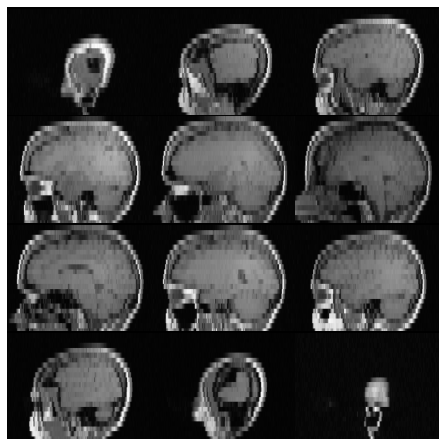

In [133]:
ants.plot(ants.image_read('/anvar/public_datasets/preproc_study/gbm/orig/TCGA-12-0616/CT1.nii.gz'))

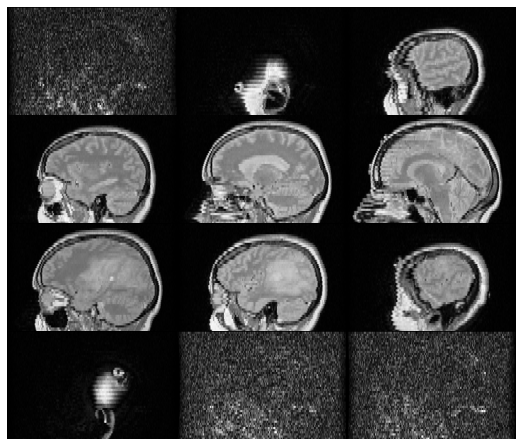

In [121]:
ants.plot(ants.image_read(base_dir + 'TCGA-06-0162/T2_e1.nii.gz'))

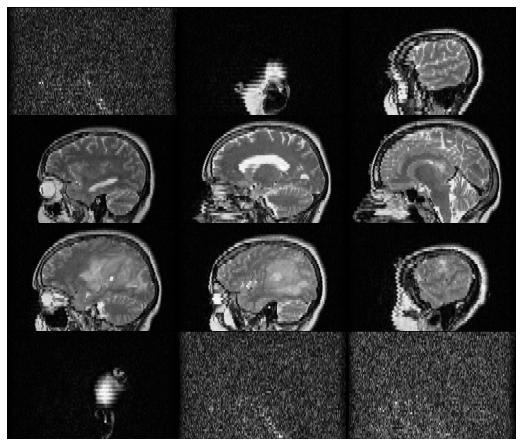

In [120]:
ants.plot(ants.image_read(base_dir + 'TCGA-06-0162/T2_e1a.nii.gz'))

In [110]:
t2_e2_list = glob.glob(base_dir+'/*/T2_e2*.nii.gz')

for j in [i.split('T2_e2')[0] for i in t2_e2_list]:
    os.rename(j + 'T2_e2.nii.gz', j + 'T2.nii.gz')

In [115]:
t2_real_list = glob.glob(base_dir+'/*/T2_real.nii.gz')

for j in [i.split('T2_real')[0] for i in t2_real_list]:
    os.rename(j + 'T2_real.nii.gz', j + 'T2.nii.gz')

In [183]:
t1_real_list = glob.glob(base_dir+'/*/T1_real.nii.gz')

for j in [i.split('T1_real')[0] for i in t1_real_list]:
    os.rename(j + 'T1_real.nii.gz', j + 'T1.nii.gz')

In [122]:
t2_e1a_list = glob.glob(base_dir+'/*/T2_e1a.nii.gz')

for j in [i.split('T2_e1a')[0] for i in t2_e1a_list]:
    os.rename(j + 'T2_e1a.nii.gz', j + 'T2.nii.gz')

In [199]:
ct1_e1b_list = glob.glob(base_dir+'/*/CT1_e2.nii.gz')

for j in [i.split('CT1_e2')[0] for i in ct1_e1b_list]:
    os.rename(j + 'CT1_e2.nii.gz', j + 'CT1.nii.gz')

In [124]:
flair_real_list = glob.glob(base_dir+'/*/FLAIR_real.nii.gz')

for j in [i.split('FLAIR_real')[0] for i in flair_real_list]:
    os.rename(j + 'FLAIR_real.nii.gz', j + 'FLAIR.nii.gz')

In [198]:
os.listdir(base_dir + 'TCGA-08-0512')

['T1.nii.gz', 'T1.json']

In [214]:
import ants
for i in list_masks:
#     print(i)
    try:
        t1 = ants.image_read(base_dir + i + '/T1.nii.gz')
        t1c = ants.image_read(base_dir + i + '/CT1.nii.gz')
        t2 = ants.image_read(base_dir + i + '/T2.nii.gz')
        flair = ants.image_read(base_dir + i + '/FLAIR.nii.gz')
    except Exception as e:
        print(e)
        pass

File /anvar/public_datasets/preproc_study/gbm/orig/license.html/T1.nii.gz does not exist!


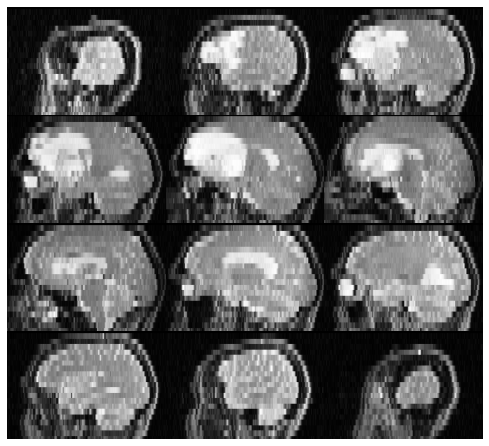

In [196]:
ants.plot(ants.image_read(base_dir + 'TCGA-76-6282/CT1_e2.nii.gz'))

In [189]:
os.listdir('/anvar/public_datasets/tcia/manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-76-6193/06-02-2001-MRI BRAIN STRYKER JHN IP-60175')

['4.000000-BRAINNONCONTRASTFLAIRA-83981',
 '9.000000-BRAINSTRYKERAX-RAGE-STRY-89080',
 '7.000000-BRAINCONTRASTDOUBLEECHO-99899',
 '10.000000-BRAINSTRYKERt1AX-91010']

In [192]:
gbm_paths.columns

Index(['Unnamed: 0', 'ID', 'T1', 'T1C', 'T2', 'FLAIR'], dtype='object')

In [201]:
gbm_paths[gbm_paths['ID'] == 'TCGA-02-0075'].values

array([[25, 'TCGA-02-0075',
        ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-02-0075/09-24-1999-MRI BRAIN WWO CONTRAST-32875/14.000000-FSPGR 3D-90164',
        ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-02-0075/09-24-1999-MRI BRAIN WWO CONTRAST-32875/17.000000-Ax SE T1 Post-08723',
        ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-02-0075/09-24-1999-MRI BRAIN WWO CONTRAST-32875/10.000000-FSE T2-35736',
        ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-02-0075/09-24-1999-MRI BRAIN WWO CONTRAST-32875/11.000000-T2 FLAIR-76096']],
      dtype=object)

## Check naming 

In [215]:
metadata = pd.read_csv('metadata.csv')

In [221]:
metadata['File Location'][0]

'.\\TCGA-GBM\\TCGA-02-0006\\08-23-1996-MRI BRAIN W WO CONTRAMR-42545\\300.000000-AX T1 Glioma Segmentation Corrected-61527'

In [229]:
metadata['Series Description'].value_counts()

AXIAL FLAIR Glioma Segmentation                      40
AXIAL FLAIR Glioma Segmentation Corrected            38
AX T1 POST GD FLAIR Glioma Segmentation              33
AX T2 FR-FSE RF2 150 Glioma Segmentation             33
AX T1 pre gd Glioma Segmentation                     33
                                                     ..
STROKE     FLAIR Glioma Segmentation                  1
SEIZURE    T2 GRASE Glioma Segmentation Corrected     1
Brain      T1WSE Glioma Segmentation Corrected        1
STROKE     FLAIR Glioma Segmentation Corrected        1
3D AXIALIRSPGRFast Glioma Segmentation Corrected      1
Name: Series Description, Length: 367, dtype: int64

In [275]:
# os.listdir('/anvar/public_datasets/preproc_study/gbm/dicom/')

In [249]:
import pydicom
from pydicom import dcmread

temp_list = os.listdir('/anvar/public_datasets/preproc_study/gbm/dicom/' + gbm_paths['ID'].iloc[0] + '/T1/')
dcmread('/anvar/public_datasets/preproc_study/gbm/dicom/' +\
        gbm_paths['ID'].iloc[0] + '/T1/' + temp_list[0]).StudyInstanceUID

'1.3.6.1.4.1.14519.5.2.1.1706.4001.278960043528371206673900239956'

In [230]:
gbm_paths['FLAIR'][gbm_paths['ID'] == 'TCGA-06-0182'].values

array([' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-06-0182/09-01-2002-MRI BRAIN WWO CONTRAS-96990/7.000000-AxFLAIR-thin for surgery-31783'],
      dtype=object)

In [228]:
metadata[metadata['Subject ID'] == 'TCGA-02-0006']

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.2.276.0.7230010.3.1.3.8323329.363456.1540933...,TCGA-GBM,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-02-0006,1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...,MRI BRAIN W WO CONTRAMR,08-23-1996,AX T1 Glioma Segmentation Corrected,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,596.64 KB,.\TCGA-GBM\TCGA-02-0006\08-23-1996-MRI BRAIN W...,2021-07-01T23:58:55.447
1,1.2.276.0.7230010.3.1.3.8323329.363425.1540933...,TCGA-GBM,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-02-0006,1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...,MRI BRAIN W WO CONTRAMR,08-23-1996,AX FLAIR Glioma Segmentation Corrected,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,596.64 KB,.\TCGA-GBM\TCGA-02-0006\08-23-1996-MRI BRAIN W...,2021-07-01T23:58:55.516
2,1.2.276.0.7230010.3.1.3.8323329.363465.1540933...,TCGA-GBM,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-02-0006,1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...,MRI BRAIN W WO CONTRAMR,08-23-1996,AX T2 FSE Glioma Segmentation Corrected,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,596.64 KB,.\TCGA-GBM\TCGA-02-0006\08-23-1996-MRI BRAIN W...,2021-07-01T23:58:57.49
3,1.2.276.0.7230010.3.1.3.8323329.363974.1540933...,TCGA-GBM,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-02-0006,1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...,MRI BRAIN W WO CONTRAMR,08-23-1996,AX T1 POST Glioma Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,596.62 KB,.\TCGA-GBM\TCGA-02-0006\08-23-1996-MRI BRAIN W...,2021-07-01T23:58:57.58
4,1.2.276.0.7230010.3.1.3.8323329.363423.1540933...,TCGA-GBM,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-02-0006,1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...,MRI BRAIN W WO CONTRAMR,08-23-1996,AX T1 POST Glioma Segmentation Corrected,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,596.64 KB,.\TCGA-GBM\TCGA-02-0006\08-23-1996-MRI BRAIN W...,2021-07-01T23:58:59.453
5,1.2.276.0.7230010.3.1.3.8323329.363999.1540933...,TCGA-GBM,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-02-0006,1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...,MRI BRAIN W WO CONTRAMR,08-23-1996,AX T1 Glioma Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,596.62 KB,.\TCGA-GBM\TCGA-02-0006\08-23-1996-MRI BRAIN W...,2021-07-01T23:59:00.057
6,1.2.276.0.7230010.3.1.3.8323329.363998.1540933...,TCGA-GBM,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-02-0006,1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...,MRI BRAIN W WO CONTRAMR,08-23-1996,AX FLAIR Glioma Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,596.62 KB,.\TCGA-GBM\TCGA-02-0006\08-23-1996-MRI BRAIN W...,2021-07-01T23:59:00.258
7,1.2.276.0.7230010.3.1.3.8323329.364017.1540933...,TCGA-GBM,yes,https://doi.org/10.7937/TCIA.2018.ow6ce3ml,TCGA-02-0006,1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...,MRI BRAIN W WO CONTRAMR,08-23-1996,AX T2 FSE Glioma Segmentation,QIICR,SEG,Segmentation Storage,1.2.840.10008.5.1.4.1.1.66.4,1,596.62 KB,.\TCGA-GBM\TCGA-02-0006\08-23-1996-MRI BRAIN W...,2021-07-01T23:59:01.417


In [ ]:
1. создаем список инстансов с метаданных с коррекцией
2. создаем список инстансов из папки
3. сравниваем, чтобы все элементы из папки были в метаданных
4. пишем кого нет и ID

In [258]:
metadata = metadata[metadata['Series Description'].str.find('Corrected') > 0]

In [265]:
temp_uid

'1.3.6.1.4.1.14519.5.2.1.8862.4001.119873216352344754496678099313'

In [267]:
temp_uid

'1.3.6.1.4.1.14519.5.2.1.8862.4001.119873216352344754496678099313'

In [268]:
list_uids_meta

[]

In [273]:
gbm_paths[gbm_paths['ID'] == 'TCGA-08-0509'].values

array([[53, 'TCGA-08-0509',
        ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-08-0509/11-13-1997-MSTEALTH-79103/1.000000-FMPSPGR SAG-19386',
        ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-08-0509/11-13-1997-MSTEALTH-79103/2.000000-3DSPGR AXIAL-93298',
        ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-08-0509/11-13-1997-MSTEALTH-79103/3.000000-3DFSE AXIAL-99672',
        ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-08-0509/11-13-1997-MSTEALTH-79103/4.000000-FLAIR AXIAL-76805']],
      dtype=object)

In [274]:
modality = ['/T1/', '/CT1/', '/T2/', '/FLAIR/']
for i in list_masks:
    
    list_uids_meta = list(metadata['Study UID'][(metadata['Subject ID'] == i)])
    
    for j in modality:
        temp_list = os.listdir('/anvar/public_datasets/preproc_study/gbm/dicom/' + i + j)
        temp_uid = dcmread('/anvar/public_datasets/preproc_study/gbm/dicom/'+ i + j + temp_list[1]).StudyInstanceUID
        if not temp_uid in list_uids_meta:
            print('problems ', i, j, temp_uid)

problems  TCGA-08-0509 /T1/ 1.3.6.1.4.1.14519.5.2.1.7695.4001.292568156105181015740272479103
problems  TCGA-08-0509 /CT1/ 1.3.6.1.4.1.14519.5.2.1.7695.4001.292568156105181015740272479103
problems  TCGA-08-0509 /T2/ 1.3.6.1.4.1.14519.5.2.1.7695.4001.292568156105181015740272479103
problems  TCGA-08-0509 /FLAIR/ 1.3.6.1.4.1.14519.5.2.1.7695.4001.292568156105181015740272479103
problems  TCGA-12-3650 /T1/ 1.3.6.1.4.1.14519.5.2.1.8862.4001.853973730099261399255070895330
problems  TCGA-12-3650 /CT1/ 1.3.6.1.4.1.14519.5.2.1.8862.4001.853973730099261399255070895330
problems  TCGA-12-3650 /T2/ 1.3.6.1.4.1.14519.5.2.1.8862.4001.853973730099261399255070895330
problems  TCGA-12-3650 /FLAIR/ 1.3.6.1.4.1.14519.5.2.1.8862.4001.853973730099261399255070895330
problems  TCGA-02-0070 /T1/ 1.3.6.1.4.1.14519.5.2.1.1706.4001.288983046313649223240718848290
problems  TCGA-02-0070 /CT1/ 1.3.6.1.4.1.14519.5.2.1.1706.4001.288983046313649223240718848290
problems  TCGA-02-0070 /T2/ 1.3.6.1.4.1.14519.5.2.1.1706.4001

FileNotFoundError: [Errno 2] No such file or directory: '/anvar/public_datasets/preproc_study/gbm/dicom/license.html/T1/'

In [279]:
gbm_paths[gbm_paths['ID'] == 'TCGA-08-0509'].values

array([[53, 'TCGA-08-0509',
        ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-08-0509/11-13-1997-MSTEALTH-79103/1.000000-FMPSPGR SAG-19386',
        ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-08-0509/11-13-1997-MSTEALTH-79103/2.000000-3DSPGR AXIAL-93298',
        ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-08-0509/11-13-1997-MSTEALTH-79103/3.000000-3DFSE AXIAL-99672',
        ' manifest-21CCx8fx964169794518489879/TCGA-GBM/TCGA-08-0509/11-13-1997-MSTEALTH-79103/4.000000-FLAIR AXIAL-76805']],
      dtype=object)

TCGA-08-0509


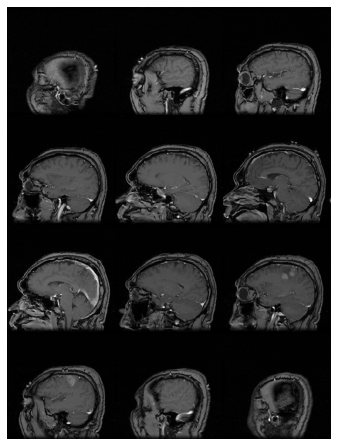

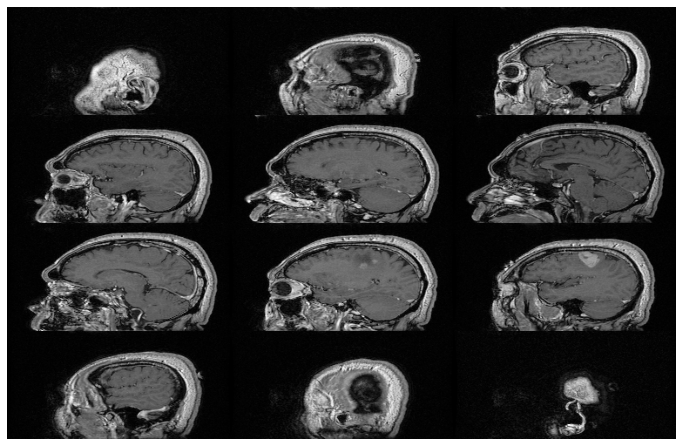

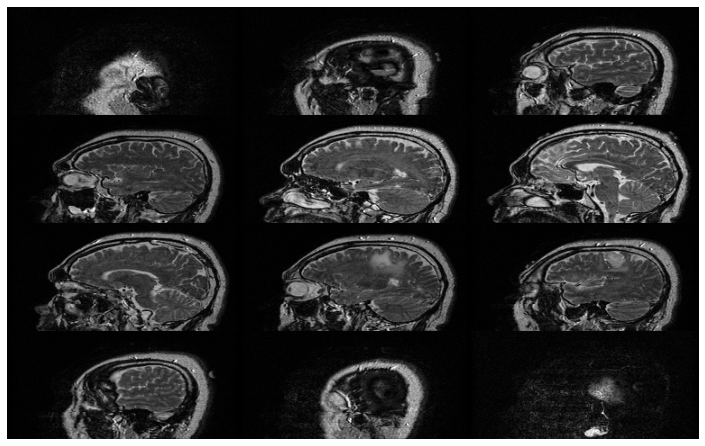

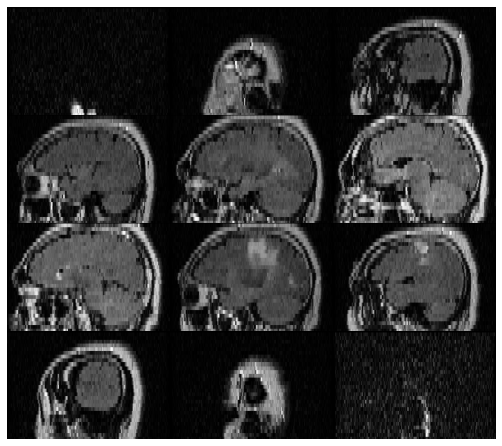

TCGA-12-3650


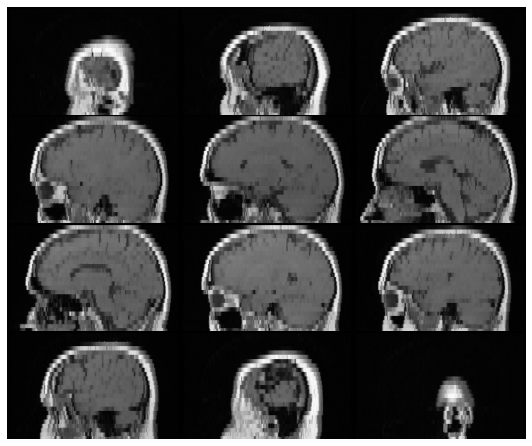

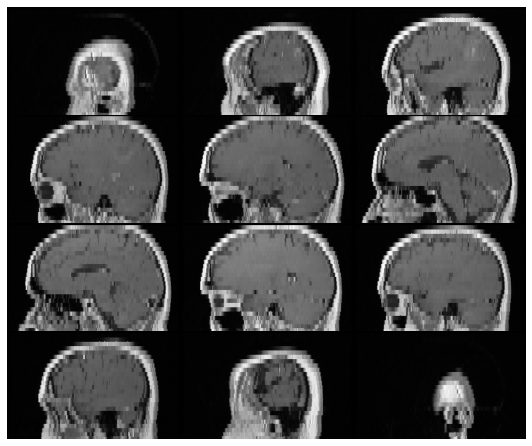

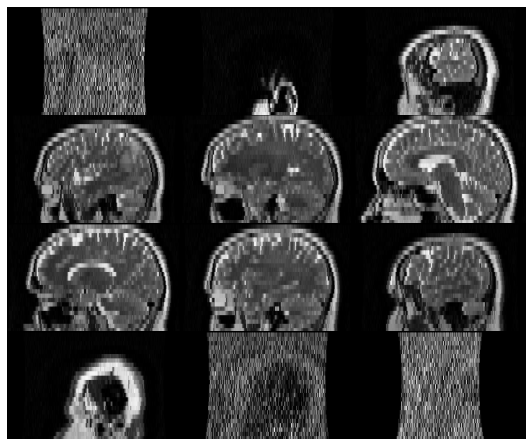

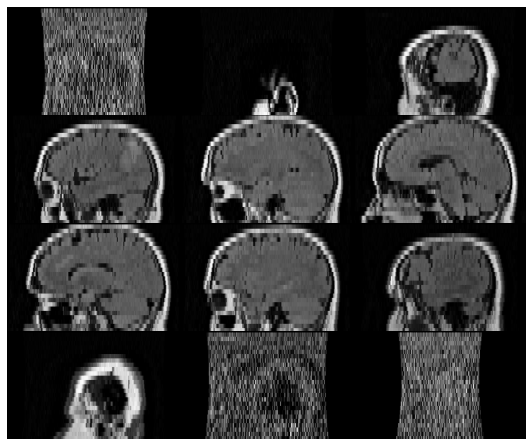

TCGA-02-0070


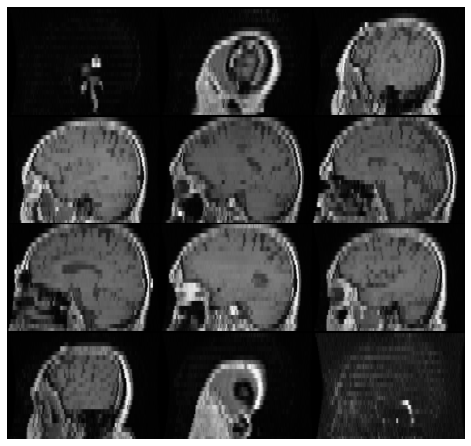

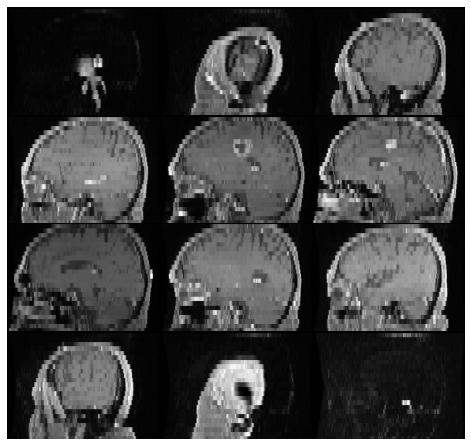

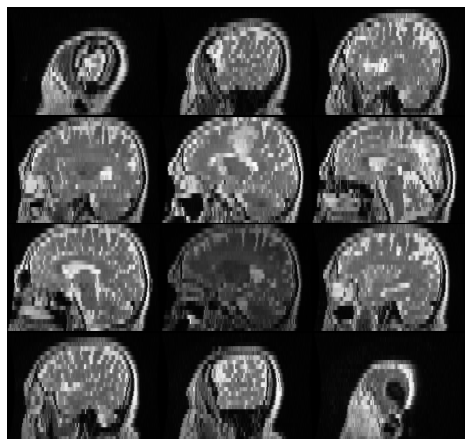

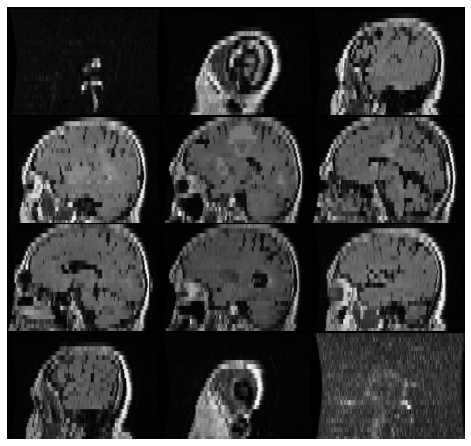

In [276]:
import ants
for i in ['TCGA-08-0509', 'TCGA-12-3650', 'TCGA-02-0070']:
    print(i)
    try:
        t1 = ants.image_read(base_dir + i + '/T1.nii.gz')
        ants.plot(t1)
        t1c = ants.image_read(base_dir + i + '/CT1.nii.gz')
        ants.plot(t1c)
        t2 = ants.image_read(base_dir + i + '/T2.nii.gz')
        ants.plot(t2)
        flair = ants.image_read(base_dir + i + '/FLAIR.nii.gz')
        ants.plot(flair)
    except Exception as e:
        print(e)
        pass

In [224]:
metadata.iloc[0]

Series UID              1.2.276.0.7230010.3.1.3.8323329.363456.1540933...
Collection                                                       TCGA-GBM
3rd Party Analysis                                                    yes
Data Description URI           https://doi.org/10.7937/TCIA.2018.ow6ce3ml
Subject ID                                                   TCGA-02-0006
Study UID               1.3.6.1.4.1.14519.5.2.1.1706.4001.149500105036...
Study Description                                 MRI BRAIN W WO CONTRAMR
Study Date                                                     08-23-1996
Series Description                    AX T1 Glioma Segmentation Corrected
Manufacturer                                                        QIICR
Modality                                                              SEG
SOP Class Name                                       Segmentation Storage
SOP Class UID                                1.2.840.10008.5.1.4.1.1.66.4
Number of Images                      

### delete wrong namings

In [293]:
for i in glob.glob(base_dir +'/*/*real*'):
    os.remove(i)

In [295]:
glob.glob(base_dir +'/*/*')

['/anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0086/T2.nii.gz',
 '/anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0086/FLAIR.nii.gz',
 '/anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0086/CT1.json',
 '/anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0086/T1.nii.gz',
 '/anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0086/T2.json',
 '/anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0086/T1.json',
 '/anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0086/CT1.nii.gz',
 '/anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0086/FLAIR.json',
 '/anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0102/T2.nii.gz',
 '/anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0102/FLAIR.nii.gz',
 '/anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0102/CT1.json',
 '/anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0102/T1.nii.gz',
 '/anvar/public_datasets/preproc_study/gbm/orig/TCGA-02-0102/T2.json',
 '/anvar/public_datasets/preproc_study/gbm/orig/TCG

## 2. LGG repository

In [46]:
sizes_frame['t1c_z'].min(), sizes_frame['t1c_z'].max()

(15, 216)

In [47]:
tcia_lgg_raw = '/anvar/public_datasets/tcia/manifest-25ZdsnMy5264093150469993200/TCGA-LGG/TCGA-CS-5390'